In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
full = cv2.cvtColor(cv2.imread('sammy.jpg'),cv2.COLOR_BGR2RGB) # full image
face = cv2.cvtColor(cv2.imread('sammy_face.jpg'),cv2.COLOR_BGR2RGB) #template
# plt.imshow(face)
face.shape

(375, 486, 3)

In [23]:
heigth,width,channels = face.shape
full_copy = full.copy()

In [24]:
res = cv2.matchTemplate(full_copy,face,cv2.TM_CCOEFF)

In [25]:
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

In [26]:
top_left = max_loc
bottom_right = (top_left[0]+width,top_left[1]+heigth)

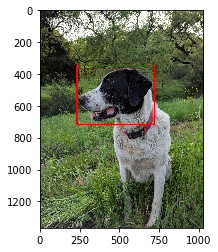

In [27]:
cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),5)
plt.imshow(full_copy)

In [28]:
method = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

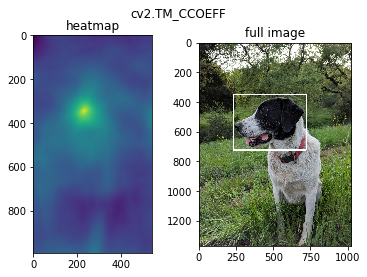

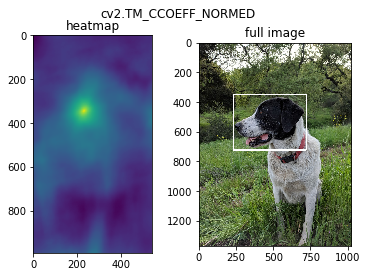

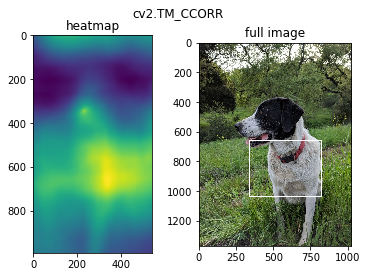

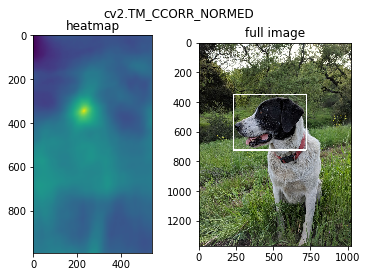

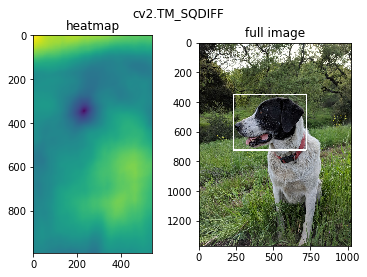

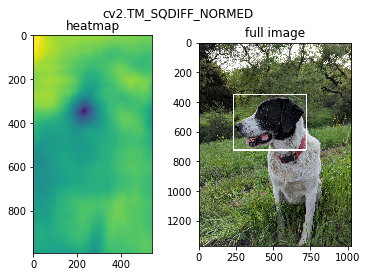

In [34]:
for m in method:
    full_copy = full.copy()
    
    m1 = eval(m)
    
    res = cv2.matchTemplate(full_copy,face,m1)
    min_value,max_value,min_pos,max_pos = cv2.minMaxLoc(res)
    
    if m1 in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_pos
    else:
        top_left = max_pos
    
    bottom_right = (top_left[0]+width,top_left[1]+heigth)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,255,255),6)
    plt.subplot(121)
    plt.title('heatmap')
    plt.imshow(res)
    plt.subplot(122)
    plt.title('full image')
    plt.imshow(full_copy)
    plt.suptitle(m)
    plt.show()
    print('\n')
    print('\n')
